In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

[2]


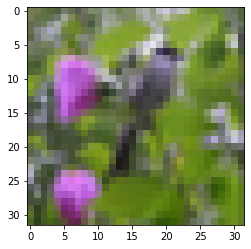

In [8]:
i=300
plt.imshow(X_train[i])
print(y_train[i])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


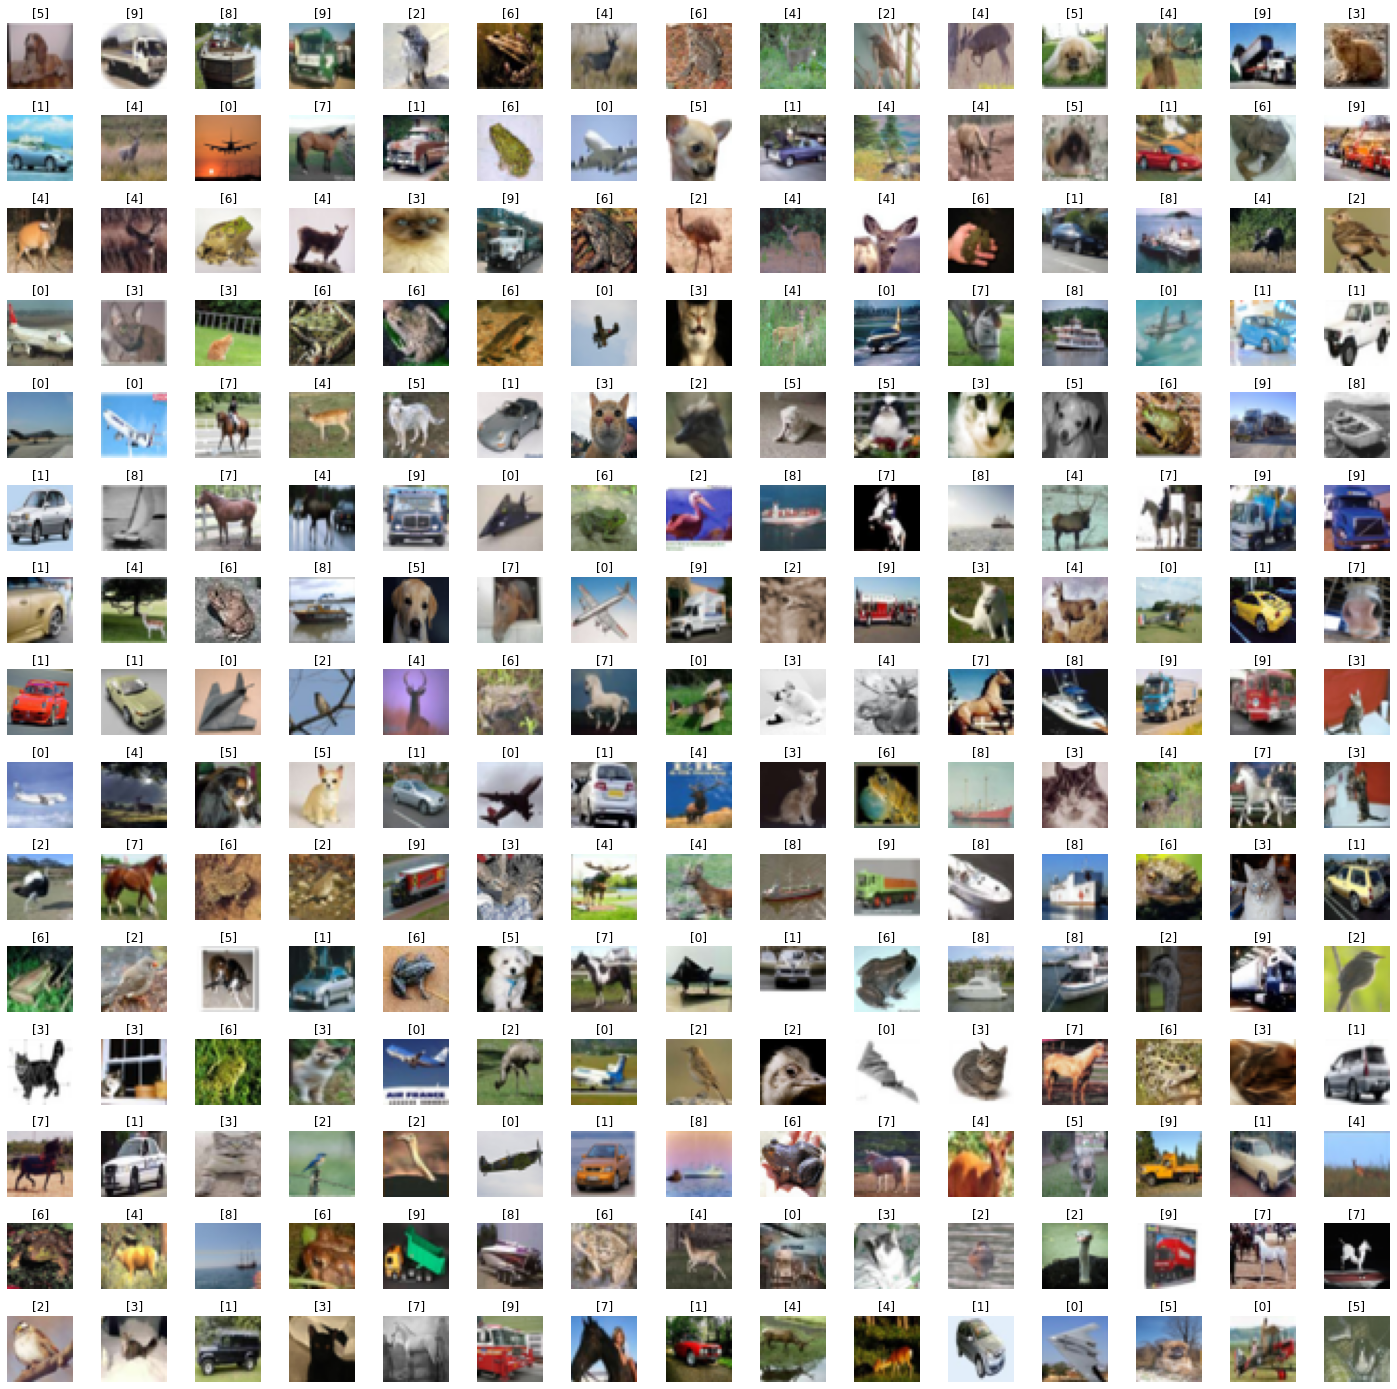

In [9]:
W_grid=15
L_grid=15
fig,axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #Prints labels on top of the picture
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [10]:
import keras
from tensorflow.keras.utils import to_categorical

In [11]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [17]:
32*32

1024

In [23]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7706 - accuracy: 0.7324
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7236 - accuracy: 0.7464
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6830 - accuracy: 0.7612
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6483 - accuracy: 0.7732
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6224 - accuracy: 0.7819
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5884 - accuracy: 0.7943
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5678 - accuracy: 0.8018
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5406 - accuracy: 0.8113
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5240 - accuracy: 0.8160
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [28]:
prediction = model.predict(X_test)
prediction

array([[2.0994725e-02, 7.1880617e-04, 1.1569124e-02, ..., 4.6369730e-04,
        3.7406043e-03, 5.6002811e-03],
       [5.0170079e-04, 4.1903559e-02, 6.0406387e-07, ..., 5.6009817e-08,
        9.5758855e-01, 4.1651319e-06],
       [4.5494419e-02, 4.3046698e-01, 6.3812179e-03, ..., 1.1678912e-03,
        4.9914756e-01, 8.6868973e-03],
       ...,
       [6.6154011e-05, 2.2126720e-05, 2.3096283e-03, ..., 1.0235623e-01,
        1.0509354e-05, 6.1194303e-05],
       [5.3941901e-04, 9.9858791e-01, 2.2024428e-06, ..., 6.8616323e-08,
        5.2428150e-06, 8.6492847e-04],
       [2.2177539e-07, 9.6644123e-07, 3.4711366e-06, ..., 9.9187565e-01,
        9.3315994e-11, 6.1127288e-08]], dtype=float32)

In [31]:
len(prediction.argmax(1))

10000

In [32]:
len(y_test.argmax(1))

10000

In [33]:
prediction = prediction.argmax(1)
y_test = y_test.argmax(1)

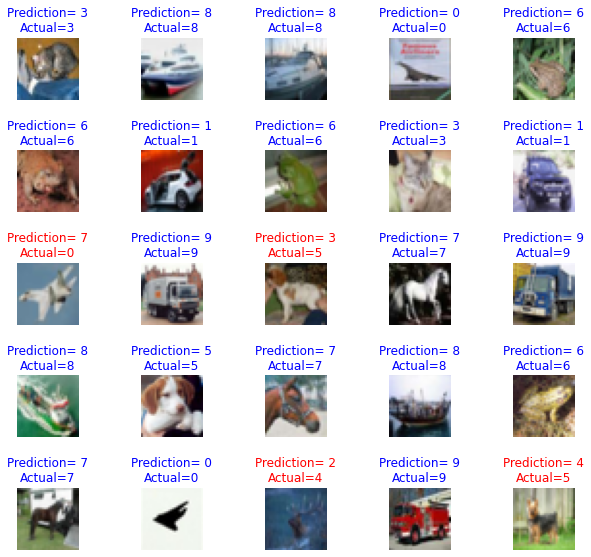

In [35]:
L=5
W=5
fig,axes=plt.subplots(L,W,figsize=(10,10))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    color = 'blue' if prediction[i]==y_test[i] else 'red'
    axes[i].set_title('Prediction= {}\nActual={}'.format(prediction[i],y_test[i]), color=color)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)